## General Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cm
from salishsea_tools import viz_tools
import matplotlib as mpl
import pandas as pd
import netCDF4 as nc
import shapely.geometry
from shapely.geometry import box
from shapely.ops import unary_union
# from datetime import datetime
# from matplotlib.dates import DateFormatter
# import matplotlib.colors as colors

In [2]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]
area = ((1-tmask) * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})[0]
volume = ((1-tmask) * mesh.e3t_0[0] * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})
max_depth = bathy.Bathymetry.rename({'y':'gridY', 'x':'gridX'})
mean_depth = np.nanmean(max_depth.to_numpy())

In [3]:
# mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
# mesh_mask_depth_var='gdept_0'

thalweg_file = '/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/stories/puget_sound/admiralty_thalweg.txt'
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)
# mesh_mask_depth_var='gdept_0'
# depth = mesh.variables[mesh_mask_depth_var][:]

In [4]:
y_thal_ad = thalweg_pts[:,0]
x_thal_ad = thalweg_pts[:,1]

In [5]:
# dimensions: gridY, gridX, time
vol_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2023, 2023))
vol_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2022, 2022))
vol_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2021, 2021))
vol_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2020, 2020))
vol_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2019, 2019))

## Functions

In [6]:
tablist_nogrey = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan', 'darkgrey']

## Cross-sections

In [7]:
def y_mxb(m, x, b):
    y = m * x + b
    return y

In [8]:
def create_transect(x1, x2, y1, y2):
    m = (y2- y1)/(x2-x1)
    x_all = np.arange(x1, x2+1)
    y_all = y_mxb(m, x_all, y1)
    # x_grid = x_all.round()
    # y_grid = y_all.round()
    x_grid = np.floor(x_all).astype(int)
    y_grid = np.floor(y_all).astype(int)
    return x_grid, y_grid


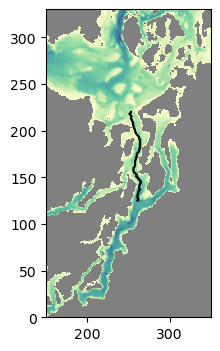

In [9]:
fig, ax = plt.subplots(1,1, figsize=(4, 4))
mycmap = cm.deep
mycmap.set_bad('grey')

ax.pcolormesh(bathy['Bathymetry'], cmap=mycmap)
ax.set_xlim(150,350)
ax.set_ylim(0,330)
viz_tools.set_aspect(ax);
ax.plot(x_thal_ad, y_thal_ad, color='k')

In [10]:
vol_2023_thal_ad = vol_2023_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad)).mean(dim='time')
vol_2022_thal_ad = vol_2022_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad)).mean(dim='time')
vol_2021_thal_ad = vol_2021_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad)).mean(dim='time')
vol_2020_thal_ad = vol_2020_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad)).mean(dim='time')
vol_2019_thal_ad = vol_2019_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad)).mean(dim='time')

In [11]:
# vol_2023_john = vol_2023_mon['snohomish_river'].sel(gridX=xr.DataArray(x_john), gridY=xr.DataArray(y_john)).mean(dim='time')
# vol_2022_john = vol_2022_mon['snohomish_river'].sel(gridX=xr.DataArray(x_john), gridY=xr.DataArray(y_john)).mean(dim='time')
# vol_2021_john = vol_2021_mon['snohomish_river'].sel(gridX=xr.DataArray(x_john), gridY=xr.DataArray(y_john)).mean(dim='time')
# vol_2020_john = vol_2020_mon['snohomish_river'].sel(gridX=xr.DataArray(x_john), gridY=xr.DataArray(y_john)).mean(dim='time')
# vol_2019_john = vol_2019_mon['snohomish_river'].sel(gridX=xr.DataArray(x_john), gridY=xr.DataArray(y_john)).mean(dim='time')

In [12]:
# vol_2023_admir = vol_2023_mon['snohomish_river'].sel(gridX=xr.DataArray(x_admir), gridY=xr.DataArray(y_admir)).mean(dim='time')
# vol_2022_admir = vol_2022_mon['snohomish_river'].sel(gridX=xr.DataArray(x_admir), gridY=xr.DataArray(y_admir)).mean(dim='time')
# vol_2021_admir = vol_2021_mon['snohomish_river'].sel(gridX=xr.DataArray(x_admir), gridY=xr.DataArray(y_admir)).mean(dim='time')
# vol_2020_admir = vol_2020_mon['snohomish_river'].sel(gridX=xr.DataArray(x_admir), gridY=xr.DataArray(y_admir)).mean(dim='time')
# vol_2019_admir = vol_2019_mon['snohomish_river'].sel(gridX=xr.DataArray(x_admir), gridY=xr.DataArray(y_admir)).mean(dim='time')

In [13]:
# vol_2023_decep = vol_2023_mon['snohomish_river'].sel(gridX=xr.DataArray(x_decep), gridY=xr.DataArray(y_decep)).mean(dim='time')
# vol_2022_decep = vol_2022_mon['snohomish_river'].sel(gridX=xr.DataArray(x_decep), gridY=xr.DataArray(y_decep)).mean(dim='time')
# vol_2021_decep = vol_2021_mon['snohomish_river'].sel(gridX=xr.DataArray(x_decep), gridY=xr.DataArray(y_decep)).mean(dim='time')
# vol_2020_decep = vol_2020_mon['snohomish_river'].sel(gridX=xr.DataArray(x_decep), gridY=xr.DataArray(y_decep)).mean(dim='time')
# vol_2019_decep = vol_2019_mon['snohomish_river'].sel(gridX=xr.DataArray(x_decep), gridY=xr.DataArray(y_decep)).mean(dim='time')

In [14]:
vol_all_thal_ad = xr.concat([vol_2019_thal_ad, vol_2020_thal_ad, vol_2021_thal_ad, vol_2022_thal_ad, vol_2023_thal_ad], dim='time').mean(dim='time')
# vol_all_john = xr.concat([vol_2019_john, vol_2020_john, vol_2021_john, vol_2022_john, vol_2023_john], dim='time').mean(dim='time')
# vol_all_admir = xr.concat([vol_2019_admir, vol_2020_admir, vol_2021_admir, vol_2022_admir, vol_2023_admir], dim='time').mean(dim='time')
# vol_all_decep = xr.concat([vol_2019_decep, vol_2020_decep, vol_2021_decep, vol_2022_decep, vol_2023_decep], dim='time').mean(dim='time')

In [15]:
tmask_thal_ad = tmask.sel(x=xr.DataArray(x_thal_ad.astype(int)), y=xr.DataArray(y_thal_ad.astype(int)))
# tmask_john = tmask.sel(x=xr.DataArray(x_john.astype(int)), y=xr.DataArray(y_john.astype(int)))
# tmask_admir = tmask.sel(x=xr.DataArray(x_admir.astype(int)), y=xr.DataArray(y_admir.astype(int)))
# tmask_decep = tmask.sel(x=xr.DataArray(x_decep.astype(int)), y=xr.DataArray(y_decep.astype(int)))

In [16]:
volume_thal_ad = volume.sel(gridX=xr.DataArray(x_thal_ad.astype(int)), gridY=xr.DataArray(y_thal_ad.astype(int)))
# volume_john = volume.sel(gridX=xr.DataArray(x_john.astype(int)), gridY=xr.DataArray(y_john.astype(int)))
# volume_admir = volume.sel(gridX=xr.DataArray(x_admir.astype(int)), gridY=xr.DataArray(y_admir.astype(int)))
# volume_decep = volume.sel(gridX=xr.DataArray(x_decep.astype(int)), gridY=xr.DataArray(y_decep.astype(int)))

In [17]:
conc_all_thal_ad = vol_all_thal_ad / volume_thal_ad
# conc_all_john = vol_all_john / volume_john
# conc_all_admir = vol_all_admir / volume_admir
# conc_all_decep = vol_all_decep / volume_decep

In [26]:
conc_all_thal_ad.isel(depth=slice(0,24))

<xarray.DataArray (depth: 24, dim_0: 97)>
array([[0.01176097, 0.01176097, 0.01163042, ..., 0.06768722, 0.06731551,
        0.06436614],
       [0.01145253, 0.01145253, 0.01129888, ..., 0.05655381, 0.0561049 ,
        0.05429039],
       [0.01109651, 0.01109651, 0.01092075, ..., 0.04625656, 0.04555815,
        0.0446548 ],
       ...,
       [0.00717124, 0.00717124, 0.0071242 , ..., 0.01491096, 0.01495949,
        0.01493185],
       [0.00631562, 0.00631562, 0.0063943 , ..., 0.01441847, 0.01446287,
        0.01442363],
       [0.00523546, 0.00523546, 0.005236  , ..., 0.01386667, 0.01388088,
        0.01384028]])
Coordinates:
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 24.1 28.23 34.69 44.52
    gridY    (dim_0) int64 220 220 219 218 217 216 ... 130 129 128 127 126 125
    gridX    (dim_0) int64 253 253 253 251 252 253 ... 261 261 261 262 262 261
Dimensions without coordinates: dim_0

Text(62.597222222222214, 0.5, 'Grid Y')

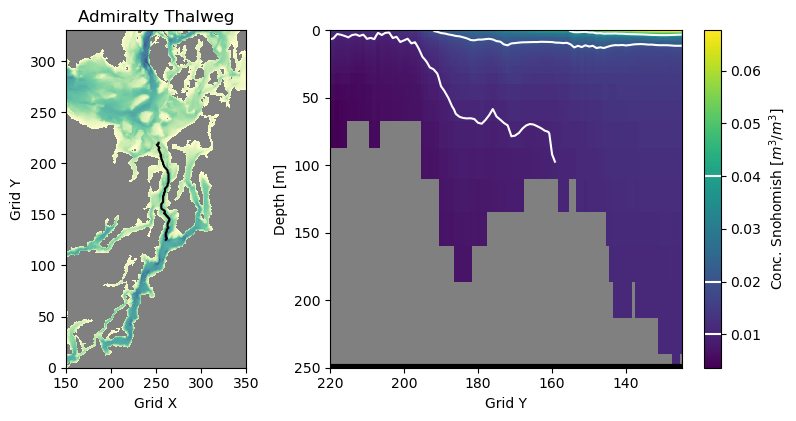

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'width_ratios': [1,2]})
fig.tight_layout(pad=1.2)

# cmap = mpl.colormaps['plasma']
# cmap = cm.amp
# fras_cont = [0.02, 0.022, 0.024, 0.026, 0.028, 0.03]
fras_cont = [0.01, 0.02, 0.04]

cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')

dim = conc_all_thal_ad.dim_0
# X = conc_all_thal_ad.gridX
X = conc_all_thal_ad.gridY + 0.000001
xmin = X.min()
xmax = X.max()
Y = conc_all_thal_ad.depth
Z = np.ma.masked_array(conc_all_thal_ad, mask=tmask_thal_ad)


colours = ax[1].pcolormesh(X, Y, Z, cmap=cmap, vmax=conc_all_thal_ad.max())
ax[1].set_ylim([250, 0])
ax[1].set_xlim([220, 125])
sum_vol_thal_ad = vol_all_thal_ad.sum().values/1000000
# ax[1].set_title('Sum: {} $*~10^6~m^3$'.format(str(sum_vol_thal_ad.round(1))))
ax[1].set_xlabel('Grid Y')
ax[1].plot([xmin-1, xmax], [249,249], color='k', linewidth=3)
ax[1].set_ylabel('Depth [m]')

cont1 = ax[1].contour(X, Y, Z, fras_cont, colors='white')
# ax[1].clabel(cont1, cont1.levels, fontsize=10)

cb = fig.colorbar(colours, ax=ax[1], label=r'Conc. Snohomish [$m^3/m^3$]', orientation='vertical')
cb.add_lines(cont1)

mycmap = cm.deep
mycmap.set_bad('grey')

ax[0].pcolormesh(bathy['Bathymetry'], cmap=mycmap)
ax[0].set_title('Admiralty Thalweg')
ax[0].set_xlim(150,350)
ax[0].set_ylim(0,330)
viz_tools.set_aspect(ax[0]);
ax[0].plot(x_thal_ad, y_thal_ad, color='k')
ax[0].set_xlabel('Grid X')
ax[0].set_ylabel('Grid Y')


Text(62.597222222222214, 0.5, 'Grid Y')

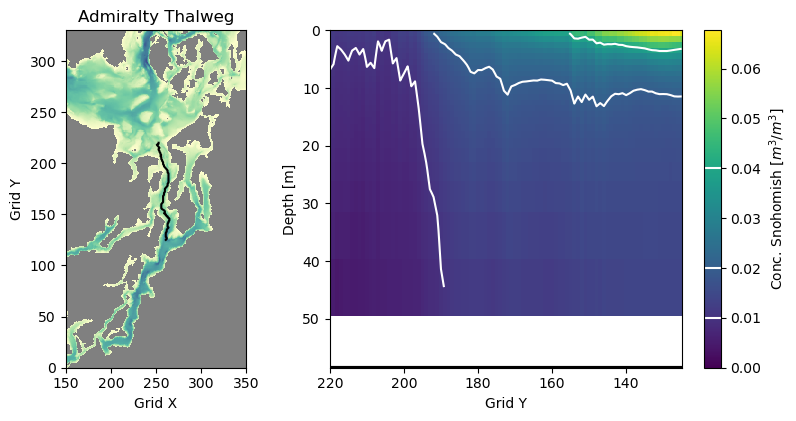

In [39]:
idmax = 24

fig, ax = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'width_ratios': [1,2]})
fig.tight_layout(pad=1.2)

# cmap = mpl.colormaps['plasma']
# cmap = cm.amp
# fras_cont = [0.02, 0.022, 0.024, 0.026, 0.028, 0.03]
fras_cont = [0.01, 0.02, 0.04]

conc_all_thal_ad_sliced = conc_all_thal_ad.isel(depth=slice(0,idmax))

cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')

dim = conc_all_thal_ad_sliced.dim_0
# X = conc_all_thal_ad_sliced.gridX
X = conc_all_thal_ad_sliced.gridY + 0.000001
xmin = X.min()
xmax = X.max()
Y = conc_all_thal_ad_sliced.depth
Z = np.ma.masked_array(conc_all_thal_ad_sliced, mask=tmask_thal_ad.isel(z=slice(0,idmax)))


colours = ax[1].pcolormesh(X, Y, Z, cmap=cmap, vmax=conc_all_thal_ad_sliced.max(), vmin=0)
ax[1].set_ylim([conc_all_thal_ad.depth[idmax], 0])
ax[1].set_xlim([220, 125])
sum_vol_thal_ad = vol_all_thal_ad.sum().values/1000000
# ax[1].set_title('Sum: {} $*~10^6~m^3$'.format(str(sum_vol_thal_ad.round(1))))
ax[1].set_xlabel('Grid Y')
ax[1].plot([xmin-1, xmax], [conc_all_thal_ad.depth[idmax],conc_all_thal_ad.depth[idmax]], color='k', linewidth=3)
ax[1].set_ylabel('Depth [m]')

cont1 = ax[1].contour(X, Y, Z, fras_cont, colors='white')
# ax[1].clabel(cont1, cont1.levels, fontsize=10)

cb = fig.colorbar(colours, ax=ax[1], label=r'Conc. Snohomish [$m^3/m^3$]', orientation='vertical')
cb.add_lines(cont1)

mycmap = cm.deep
mycmap.set_bad('grey')

ax[0].pcolormesh(bathy['Bathymetry'], cmap=mycmap)
ax[0].set_title('Admiralty Thalweg')
ax[0].set_xlim(150,350)
ax[0].set_ylim(0,330)
viz_tools.set_aspect(ax[0]);
ax[0].plot(x_thal_ad, y_thal_ad, color='k')
ax[0].set_xlabel('Grid X')
ax[0].set_ylabel('Grid Y')


In [20]:
conc_all_thal_ad.sel(depth=slice(0,10))

<xarray.DataArray (depth: 10, dim_0: 97)>
array([[0.01176097, 0.01176097, 0.01163042, 0.01079703, 0.01104323,
        0.01135701, 0.01173954, 0.01118862, 0.01097174, 0.01133493,
        0.01103709, 0.01170414, 0.0114636 , 0.01196275, 0.01045681,
        0.01095046, 0.01042639, 0.01032549, 0.01181086, 0.01164046,
        0.01318602, 0.01285034, 0.01233256, 0.0135587 , 0.01299497,
        0.01478899, 0.01679807, 0.01836038, 0.01948951, 0.02002161,
        0.02083142, 0.02223047, 0.0229758 , 0.02374612, 0.02451423,
        0.02525271, 0.02577595, 0.02621822, 0.02677187, 0.02712522,
        0.02686536, 0.02802154, 0.02809331, 0.02814402, 0.02855291,
        0.02956675, 0.03113573, 0.03133513, 0.03207597, 0.03181589,
        0.03242073, 0.03288455, 0.0333378 , 0.03384715, 0.03448721,
        0.03526868, 0.03591201, 0.03676512, 0.03744498, 0.03829988,
        0.03853949, 0.03800766, 0.03864988, 0.03887404, 0.03892402,
        0.03852639, 0.0409538 , 0.04474715, 0.04573837, 0.04525703,
        0.04376628, 0.04774024, 0.04780596, 0.05163322, 0.05160041,
        0.05475783, 0.05488761, 0.05577643, 0.05542432, 0.05688626,
        0.05686523, 0.05830598, 0.05934622, 0.06044484, 0.06171528,
        0.06261323, 0.06314599, 0.06424401, 0.06533218, 0.06511345,
        0.0659383 , 0.06630852, 0.06637337, 0.06620618, 0.06768722,
        0.06731551, 0.06436614],
...
       [0.00951291, 0.00951291, 0.00930506, 0.00857531, 0.0086389 ,
        0.00884423, 0.00903051, 0.0085512 , 0.00832947, 0.0086796 ,
        0.0083758 , 0.00931699, 0.00917816, 0.00936215, 0.00813616,
        0.00887741, 0.00850188, 0.00847185, 0.00921157, 0.00895214,
        0.00982467, 0.00952954, 0.0092445 , 0.01004527, 0.00985861,
        0.01086259, 0.0120133 , 0.0126888 , 0.01339622, 0.0136379 ,
        0.01409542, 0.01512806, 0.01551284, 0.01607839, 0.01654327,
        0.01700116, 0.01726118, 0.01773065, 0.01816775, 0.01887965,
        0.01907089, 0.01860782, 0.01861711, 0.01841598, 0.01817749,
        0.01840541, 0.01910343, 0.01935961, 0.02054833, 0.02082013,
        0.02012094, 0.01998687, 0.01978269, 0.019632  , 0.01959812,
        0.01953564, 0.01947211, 0.01946327, 0.01933238, 0.01933087,
        0.01940373, 0.01946146, 0.01974437, 0.0197799 , 0.02000011,
        0.01982607, 0.02066436, 0.02245421, 0.02160746, 0.02191911,
        0.02114948, 0.02180664, 0.02138224, 0.02275648, 0.02226006,
        0.02271667, 0.02207653, 0.02151848, 0.02117823, 0.02128152,
        0.02115385, 0.02143251, 0.02120032, 0.02085488, 0.02071504,
        0.02062965, 0.0207905 , 0.02109525, 0.02113975, 0.02141095,
        0.02160918, 0.02168006, 0.02176718, 0.02191143, 0.02204526,
        0.02196744, 0.02189576]])
Coordinates:
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.501 8.501 9.502
    gridY    (dim_0) int64 220 220 219 218 217 216 ... 130 129 128 127 126 125
    gridX    (dim_0) int64 253 253 253 251 252 253 ... 261 261 261 262 262 261
Dimensions without coordinates: dim_0

In [25]:
tmask_thal_ad[:10,:]

<xarray.DataArray 'tmask' (z: 10, dim_0: 97)>
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
...
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int8)
Dimensions without coordinates: z, dim_0

Text(62.597222222222214, 0.5, 'Grid Y')

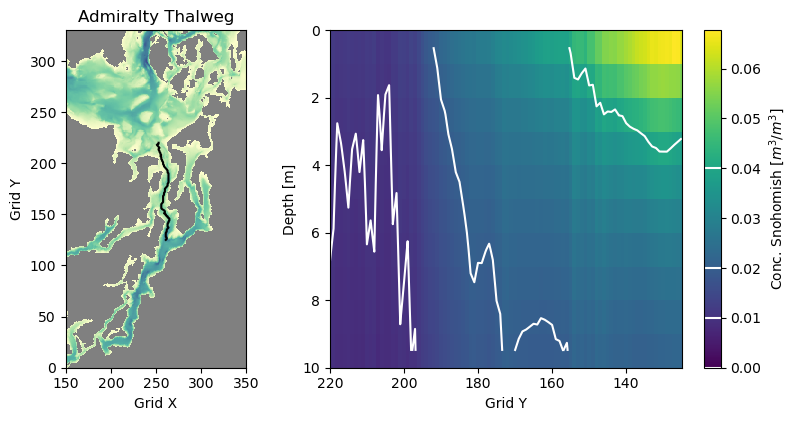

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'width_ratios': [1,2]})
fig.tight_layout(pad=1.2)

# cmap = mpl.colormaps['plasma']
# cmap = cm.amp
# fras_cont = [0.02, 0.022, 0.024, 0.026, 0.028, 0.03]
fras_cont = [0, 0.01, 0.02, 0.04]

cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')

dim = conc_all_thal_ad.sel(depth=slice(0,10)).dim_0
# X = conc_all_thal_ad.sel(depth=slice(0,10)).gridX
X = conc_all_thal_ad.sel(depth=slice(0,10)).gridY + 0.000001
xmin = X.min()
xmax = X.max()
Y = conc_all_thal_ad.sel(depth=slice(0,10)).depth
Z = np.ma.masked_array(conc_all_thal_ad.sel(depth=slice(0,10)), mask=tmask_thal_ad[:10,:])


colours = ax[1].pcolormesh(X, Y, Z, cmap=cmap, vmin=0, vmax=conc_all_thal_ad.sel(depth=slice(0,10)).max())
ax[1].set_ylim([10, 0])
ax[1].set_xlim([220, 125])
ax[1].set_xlabel('Grid Y')
ax[1].plot([xmin-1, xmax], [249,249], color='k', linewidth=3)
ax[1].set_ylabel('Depth [m]')

cont1 = ax[1].contour(X, Y, Z, fras_cont, colors='white')
# ax[1].clabel(cont1, cont1.levels, fontsize=10)

cb = fig.colorbar(colours, ax=ax[1], label=r'Conc. Snohomish [$m^3/m^3$]', orientation='vertical')
cb.add_lines(cont1)

mycmap = cm.deep
mycmap.set_bad('grey')

ax[0].pcolormesh(bathy['Bathymetry'], cmap=mycmap)
ax[0].set_title('Admiralty Thalweg')
ax[0].set_xlim(150,350)
ax[0].set_ylim(0,330)
viz_tools.set_aspect(ax[0]);
ax[0].plot(x_thal_ad, y_thal_ad, color='k')
ax[0].set_xlabel('Grid X')
ax[0].set_ylabel('Grid Y')

## September

In [19]:
vol_2023_thal_ad_sept = vol_2023_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad), time='2023-09-15T00:00:00.000000000')
vol_2022_thal_ad_sept = vol_2022_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad), time='2022-09-15T00:00:00.000000000')
vol_2021_thal_ad_sept = vol_2021_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad), time='2021-09-15T00:00:00.000000000')
vol_2020_thal_ad_sept = vol_2020_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad), time='2020-09-15T00:00:00.000000000')
vol_2019_thal_ad_sept = vol_2019_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad), time='2019-09-15T00:00:00.000000000')
vol_all_thal_ad_sept = xr.concat([vol_2019_thal_ad_sept, vol_2020_thal_ad_sept, vol_2021_thal_ad_sept, vol_2022_thal_ad_sept, vol_2023_thal_ad_sept], dim='time').mean(dim='time')
tmask_thal_ad_sept = tmask.sel(x=xr.DataArray(x_thal_ad.astype(int)), y=xr.DataArray(y_thal_ad.astype(int)))
volume_thal_ad_sept = volume.sel(gridX=xr.DataArray(x_thal_ad.astype(int)), gridY=xr.DataArray(y_thal_ad.astype(int)))
conc_all_thal_ad_sept = vol_all_thal_ad_sept / volume_thal_ad_sept

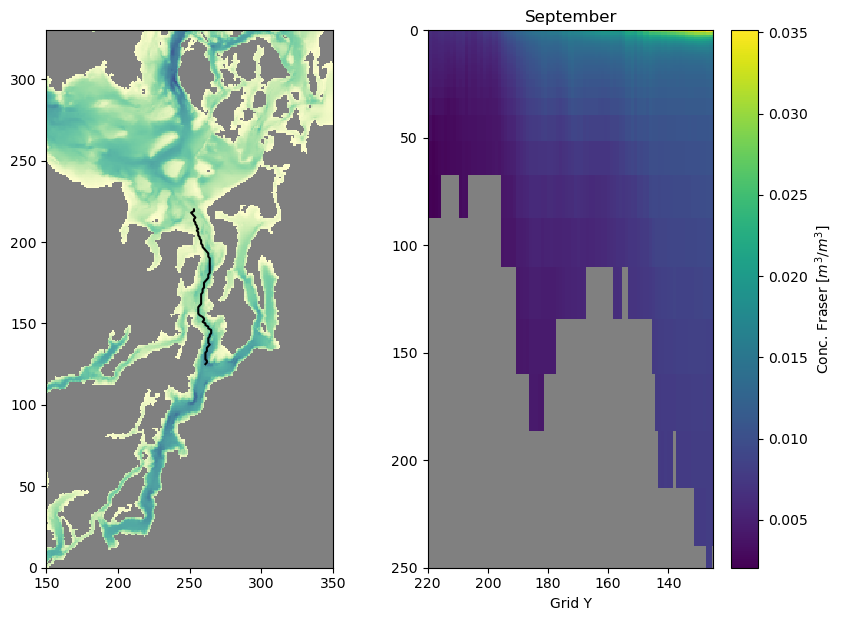

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(8.5, 6))
fig.tight_layout(pad=1.2)

# cmap = mpl.colormaps['plasma']
# cmap = cm.amp
cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')

fras_cont = [0.0175, 0.02, 0.0225, 0.025, 0.0275, 0.03]

dim = conc_all_thal_ad_sept.dim_0
# X = conc_all_thal_ad_sept.gridX
X = conc_all_thal_ad_sept.gridY
xmin = X.min()
xmax = X.max()
Y = conc_all_thal_ad_sept.depth
Z = np.ma.masked_array(conc_all_thal_ad_sept, mask=tmask_thal_ad)
colours = ax[1].pcolormesh(X, Y, Z, cmap=cmap, vmax=conc_all_thal_ad_sept.max())
ax[1].set_ylim([250, 0])
ax[1].set_xlim([220, 125])
sum_vol_thal_ad_sept = vol_all_thal_ad_sept.sum().values/1000000
# ax[1].set_title('Sum: {} $*~10^6~m^3$'.format(str(sum_vol_thal_ad_sept.round(1))))
ax[1].set_title('September')
ax[1].set_xlabel('Grid Y')

cb = fig.colorbar(colours, ax=ax[1], label=r'Conc. Snohomish [$m^3/m^3$]', orientation='vertical')
mycmap = cm.deep
mycmap.set_bad('grey')

ax[0].pcolormesh(bathy['Bathymetry'], cmap=mycmap)
ax[0].set_xlim(150,350)
ax[0].set_ylim(0,330)
viz_tools.set_aspect(ax[0]);
ax[0].plot(x_thal_ad, y_thal_ad, color='k')

## May

In [21]:
vol_2023_thal_ad_may = vol_2023_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad), time='2023-05-15T12:00:00.000000000')
vol_2022_thal_ad_may = vol_2022_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad), time='2022-05-15T12:00:00.000000000')
vol_2021_thal_ad_may = vol_2021_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad), time='2021-05-15T12:00:00.000000000')
vol_2020_thal_ad_may = vol_2020_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad), time='2020-05-15T12:00:00.000000000')
vol_2019_thal_ad_may = vol_2019_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad), time='2019-05-15T12:00:00.000000000')
vol_all_thal_ad_may = xr.concat([vol_2019_thal_ad_may, vol_2020_thal_ad_may, vol_2021_thal_ad_may, vol_2022_thal_ad_may, vol_2023_thal_ad_may], dim='time').mean(dim='time')
tmask_thal_ad_may = tmask.sel(x=xr.DataArray(x_thal_ad.astype(int)), y=xr.DataArray(y_thal_ad.astype(int)))
volume_thal_ad_may = volume.sel(gridX=xr.DataArray(x_thal_ad.astype(int)), gridY=xr.DataArray(y_thal_ad.astype(int)))
conc_all_thal_ad_may = vol_all_thal_ad_may / volume_thal_ad_may

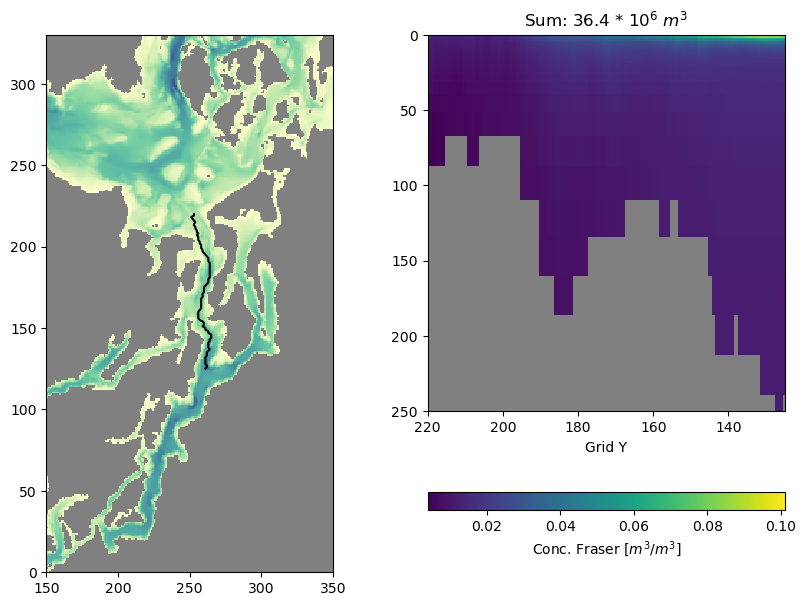

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8.5, 6))
fig.tight_layout(pad=1.2)

# cmap = mpl.colormaps['plasma']
# cmap = cm.amp
cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')

dim = conc_all_thal_ad_may.dim_0
# X = conc_all_thal_ad_may.gridX
X = conc_all_thal_ad_may.gridY
xmin = X.min()
xmax = X.max()
Y = conc_all_thal_ad_may.depth
Z = np.ma.masked_array(conc_all_thal_ad_may, mask=tmask_thal_ad)
colours = ax[1].pcolormesh(X, Y, Z, cmap=cmap, vmax=conc_all_thal_ad_may.max())
ax[1].set_ylim([250, 0])
ax[1].set_xlim([220, 125])
sum_vol_thal_ad_may = vol_all_thal_ad_may.sum().values/1000000
ax[1].set_title('Sum: {} $*~10^6~m^3$'.format(str(sum_vol_thal_ad_may.round(1))))
ax[1].set_xlabel('Grid Y')

cb = fig.colorbar(colours, ax=ax[1], label=r'Conc. Snohomish [$m^3/m^3$]', orientation='horizontal')
mycmap = cm.deep
mycmap.set_bad('grey')

ax[0].pcolormesh(bathy['Bathymetry'], cmap=mycmap)
ax[0].set_xlim(150,350)
ax[0].set_ylim(0,330)
viz_tools.set_aspect(ax[0]);
ax[0].plot(x_thal_ad, y_thal_ad, color='k')

In [23]:
vol_2023_mon['snohomish_river']

<xarray.DataArray 'snohomish_river' (time: 12, depth: 40, gridY: 898, gridX: 398)>
[171553920 values with dtype=float64]
Coordinates:
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * gridY    (gridY) int64 0 1 2 3 4 5 6 7 8 ... 890 891 892 893 894 895 896 897
  * gridX    (gridX) int64 0 1 2 3 4 5 6 7 8 ... 390 391 392 393 394 395 396 397
  * time     (time) datetime64[ns] 2023-01-15T12:00:00 ... 2023-12-15T12:00:00
Attributes:
    units:    m^3

## December

In [24]:
vol_2023_thal_ad_jan = vol_2023_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad), time='2023-01-15T12:00:00.000000000')
vol_2022_thal_ad_jan = vol_2022_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad), time='2022-01-15T12:00:00.000000000')
vol_2021_thal_ad_jan = vol_2021_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad), time='2021-01-15T12:00:00.000000000')
vol_2020_thal_ad_jan = vol_2020_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad), time='2020-01-15T12:00:00.000000000')
vol_2019_thal_ad_jan = vol_2019_mon['snohomish_river'].sel(gridX=xr.DataArray(x_thal_ad), gridY=xr.DataArray(y_thal_ad), time='2019-01-15T12:00:00.000000000')
vol_all_thal_ad_jan = xr.concat([vol_2019_thal_ad_jan, vol_2020_thal_ad_jan, vol_2021_thal_ad_jan, vol_2022_thal_ad_jan, vol_2023_thal_ad_jan], dim='time').mean(dim='time')
tmask_thal_ad_jan = tmask.sel(x=xr.DataArray(x_thal_ad.astype(int)), y=xr.DataArray(y_thal_ad.astype(int)))
volume_thal_ad_jan = volume.sel(gridX=xr.DataArray(x_thal_ad.astype(int)), gridY=xr.DataArray(y_thal_ad.astype(int)))
conc_all_thal_ad_jan = vol_all_thal_ad_jan / volume_thal_ad_jan

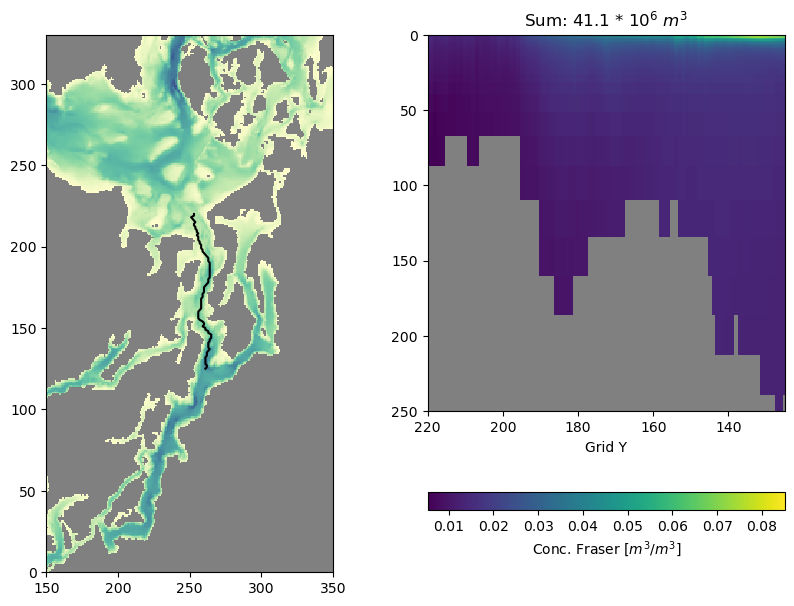

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8.5, 6))
fig.tight_layout(pad=1.2)

# cmap = mpl.colormaps['plasma']
# cmap = cm.amp
cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')

dim = conc_all_thal_ad_jan.dim_0
# X = conc_all_thal_ad_jan.gridX
X = conc_all_thal_ad_jan.gridY
xmin = X.min()
xmax = X.max()
Y = conc_all_thal_ad_jan.depth
Z = np.ma.masked_array(conc_all_thal_ad_jan, mask=tmask_thal_ad)
colours = ax[1].pcolormesh(X, Y, Z, cmap=cmap, vmax=conc_all_thal_ad_jan.max())
ax[1].set_ylim([250, 0])
ax[1].set_xlim([220, 125])
sum_vol_thal_ad_jan = vol_all_thal_ad_jan.sum().values/1000000
ax[1].set_title('Sum: {} $*~10^6~m^3$'.format(str(sum_vol_thal_ad_jan.round(1))))
ax[1].set_xlabel('Grid Y')

cb = fig.colorbar(colours, ax=ax[1], label=r'Conc. Snohomish [$m^3/m^3$]', orientation='horizontal')
mycmap = cm.deep
mycmap.set_bad('grey')

ax[0].pcolormesh(bathy['Bathymetry'], cmap=mycmap)
ax[0].set_xlim(150,350)
ax[0].set_ylim(0,330)
viz_tools.set_aspect(ax[0]);
ax[0].plot(x_thal_ad, y_thal_ad, color='k')

## All Together

Text(0.5, 3.722222222222216, 'Grid Y')

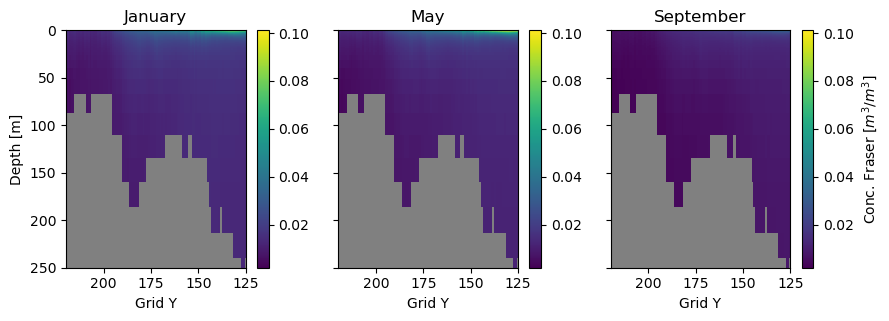

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(8.5, 3), sharey=True)
fig.tight_layout(pad=1.2)

maxed = np.array([conc_all_thal_ad_jan.max(), conc_all_thal_ad_may.max(), conc_all_thal_ad_sept.max()]).max()
mined = np.array([conc_all_thal_ad_jan.min(), conc_all_thal_ad_may.min(), conc_all_thal_ad_sept.min()]).min()
fras_cont = [0.0175, 0.02, 0.0225, 0.025, 0.0275, 0.03]

cmap = mpl.colormaps['viridis']
cmap.set_bad('gray')

## January
dim = conc_all_thal_ad_jan.dim_0
X = conc_all_thal_ad_jan.gridY
xmin = X.min()
xmax = X.max()
Y = conc_all_thal_ad_jan.depth
Z = np.ma.masked_array(conc_all_thal_ad_jan, mask=tmask_thal_ad)
colours = ax[0].pcolormesh(X, Y, Z, cmap=cmap, vmax=maxed, vmin=mined)
cb1 = fig.colorbar(colours, ax=ax[0], orientation='vertical')
ax[0].set_ylim([250, 0])
ax[0].set_xlim([220, 125])
sum_vol_thal_ad_jan = vol_all_thal_ad_jan.sum().values/1000000
# ax[0].set_title('Sum: {} $*~10^6~m^3$'.format(str(sum_vol_thal_ad_jan.round(1))))
ax[0].set_title('January')
ax[0].set_xlabel('Grid Y')
ax[0].set_ylabel('Depth [m]')

#cont1 = ax[0].contour(X, Y, Z, fras_cont, colors='white')
#ax[0].clabel(cont1, cont1.levels, fontsize=10)

## May
dim = conc_all_thal_ad_may.dim_0
X = conc_all_thal_ad_may.gridY
xmin = X.min()
xmax = X.max()
Y = conc_all_thal_ad_may.depth
Z = np.ma.masked_array(conc_all_thal_ad_may, mask=tmask_thal_ad)
colours = ax[1].pcolormesh(X, Y, Z, cmap=cmap, vmax=maxed, vmin=mined)
cb2 = fig.colorbar(colours, ax=ax[1], orientation='vertical')
ax[1].set_ylim([250, 0])
ax[1].set_xlim([220, 125])
sum_vol_thal_ad_may = vol_all_thal_ad_may.sum().values/1000000
# ax[1].set_title('Sum: {} $*~10^6~m^3$'.format(str(sum_vol_thal_ad_may.round(1))))
ax[1].set_title('May')
ax[1].set_xlabel('Grid Y')
# ax[1].set_ylabel('Depth [m]')

#cont1 = ax[1].contour(X, Y, Z, fras_cont, colors='white')
#ax[1].clabel(cont1, cont1.levels, fontsize=10)

## September
dim = conc_all_thal_ad_sept.dim_0
X = conc_all_thal_ad_sept.gridY
xmin = X.min()
xmax = X.max()
Y = conc_all_thal_ad_sept.depth
Z = np.ma.masked_array(conc_all_thal_ad_sept, mask=tmask_thal_ad)
colours = ax[2].pcolormesh(X, Y, Z, cmap=cmap, vmax=maxed, vmin=mined)
cb3 = fig.colorbar(colours, ax=ax[2], label=r'Conc. Snohomish [$m^3/m^3$]', orientation='vertical')
ax[2].set_ylim([250, 0])
ax[2].set_xlim([220, 125])
sum_vol_thal_ad_sept = vol_all_thal_ad_sept.sum().values/1000000
# ax[2].set_title('Sum: {} $*~10^6~m^3$'.format(str(sum_vol_thal_ad_sept.round(1))))
ax[2].set_title('September')
ax[2].set_xlabel('Grid Y')
# ax[2].set_ylabel('Depth [m]')

#cont1 = ax[2].contour(X, Y, Z, fras_cont, colors='white')
#ax[2].clabel(cont1, cont1.levels, fontsize=10)

# cb = fig.colorbar(colours, ax=ax[:], label=r'Conc. Snohomish [$m^3/m^3$]', orientation='vertical')
# cb.add_lines(cont1)